## Word_embedding

- Birden fazla sayisal vektorlerden olusan ve kelimeler arasi iliskileri yakalar
- sayisal degerler cogunlukla -1 ve 1 arasindan olusur 
- 0'a ne kadar yakinsa, anlamsal olarak birbirinden o kadar uzaktir 

- sozlukteki yakinliklari kiyaslamaz, cumle icindeki yakin anlamlari yakalamaya calisir
- talebe/ogrenci, muallim/ogretmen, al/kirmizi kelimelerinin ayni oldugunu ikame olarak ogrenmesi, aralarinda anlamsal iliski kurmasi 
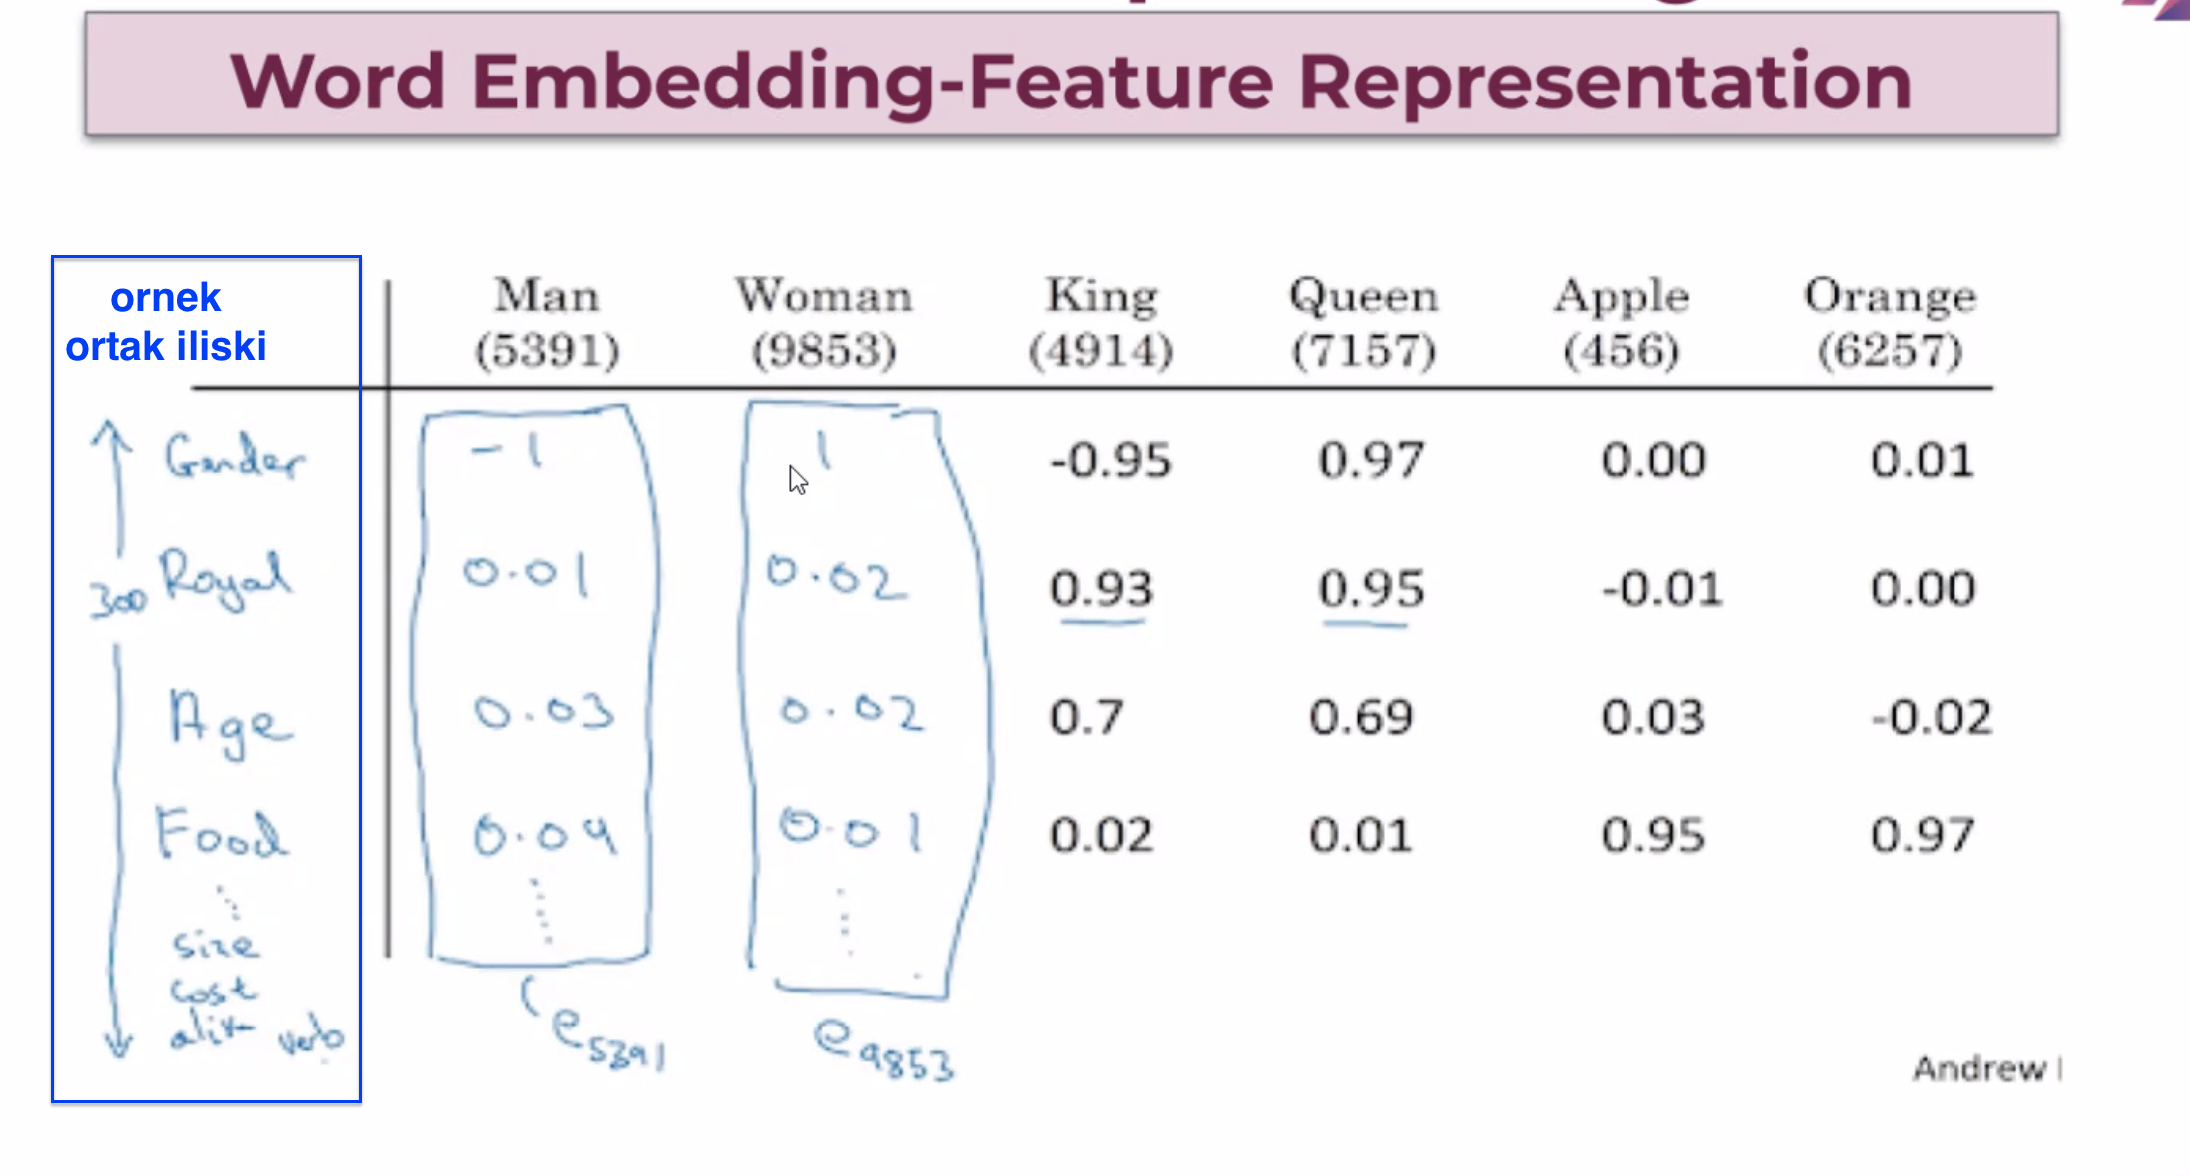

## Word2Vec

In [1]:
# pip install gensim

In [2]:
#import numpy as np
from gensim.models import Word2Vec

In [3]:
text = open('newspaper.txt', 'r', encoding='utf8')
text = text.read()
list_sent = text.split('\n')

corpus = []

for sent in list_sent:
    corpus.append(sent.split())

In [4]:
text[:1000]

'iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi \ngösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı \ndini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar \nmusevi ye ölüm ve idam idam sloganları duyuldu \nmuhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü \nden fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı \nöte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı \nhamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre münzevi yaşamı na

In [5]:
print(text[:1000])

iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi 
gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı 
dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar 
musevi ye ölüm ve idam idam sloganları duyuldu 
muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü 
den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı 
öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı 
hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre münzevi yaşamı na rağmen 

In [6]:
list_sent[:10]

['iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi ',
 'gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı ',
 'dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar ',
 'musevi ye ölüm ve idam idam sloganları duyuldu ',
 'muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü ',
 'den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı ',
 'öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı ',
 'hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere 

In [7]:
list_sent[0].split()

['iran',
 'devlet',
 'televizyonu',
 'ülkedeki',
 'eyaletin',
 'sinde',
 'yapılan',
 'reformcuları',
 'protesto',
 'amaçlı',
 'yürüyüşlere',
 'milyonlarca',
 'kişinin',
 'katıldığını',
 'bildirdi']

In [8]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [9]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)
# Buyuk corpuslarda CBOW , kucuk corpuslarda ise Skip-Gram daha iyi sonuclar verir.

In [10]:
model.wv['ankara']

array([-0.41047454, -0.12902714,  0.335122  ,  0.4004126 ,  0.56965727,
       -0.0318314 ,  0.12433423,  0.36233464, -0.10862267,  0.09190059,
        0.30934712, -0.41205457,  0.1690116 , -0.04959767,  0.12603837,
        0.3297158 ,  0.65949345, -0.05751752, -0.04743826, -0.6062991 ,
        0.10405099,  0.5016429 ,  0.15783623, -0.7984281 , -0.15614827,
       -0.02237202, -0.5087114 , -0.11824057, -0.72845215,  0.25072548,
        0.06924585,  0.1399896 , -0.23616011, -0.22765197, -0.21517323,
        0.09999806, -0.23958999, -0.29558524, -0.16377746, -0.54587364,
        0.41041207,  0.05243232,  0.35806414,  0.24305712,  0.23347296,
        0.38845032, -0.4485785 , -0.32605806,  0.31543106, -0.37430233,
        0.07136013, -0.2542288 ,  0.18578964, -0.18462722, -0.0909423 ,
       -0.01538694, -0.2302723 , -0.23994812,  0.0338483 , -0.721717  ,
        0.19956999,  0.31469604,  0.06742748,  0.20008771, -0.19432452,
        0.12471253,  0.07895178,  0.48369882, -0.44476932, -0.27

In [11]:
model.wv.most_similar('öğretmen')
# anlamsal iliski yakaladigi kelimeler
# datanin kucuk olmasi/ katsayilarin farkli yerlerden baslamasindan dolayi
# bu liste her calismada farkli cikabilir 

[('öğretmeni', 0.7835124731063843),
 ('okuldaki', 0.7768681049346924),
 ('üniversite', 0.7687249779701233),
 ('öğrencisinin', 0.7401868104934692),
 ('öğrenci', 0.7231358289718628),
 ('lise', 0.7197064161300659),
 ('öğretmenin', 0.7131263017654419),
 ('erkekten', 0.7098607420921326),
 ('ilkokul', 0.7082861661911011),
 ('öğrencilerine', 0.7027888894081116)]

In [12]:
model.wv.most_similar('kırmızı')

[('sarı', 0.665897011756897),
 ('çizgileri', 0.650208592414856),
 ('turuncu', 0.6175042986869812),
 ('gömlekliler', 0.6136624217033386),
 ('gömlekli', 0.6075372099876404),
 ('tişörtler', 0.6066768169403076),
 ('halıda', 0.6050797700881958),
 ('ışıkta', 0.598015546798706),
 ('gömleklilerin', 0.5967900156974792),
 ('halı', 0.5920984745025635)]

In [13]:
model.wv.most_similar('eve')

[('evine', 0.8063250780105591),
 ('dükkana', 0.7576191425323486),
 ('apartmana', 0.7408550977706909),
 ('mağazaya', 0.736753523349762),
 ('karakola', 0.7157214283943176),
 ('arabaya', 0.7127662897109985),
 ('restorana', 0.7104488015174866),
 ('sinemaya', 0.7101097106933594),
 ('hapishaneye', 0.6978005170822144),
 ('kulübüne', 0.6953337788581848)]

In [14]:
model.wv.most_similar('mavi')

[('marmara', 0.8996945023536682),
 ('gemisine', 0.6827365756034851),
 ('baskınına', 0.6402572393417358),
 ('baskınıyla', 0.6359377503395081),
 ('baskınının', 0.6114559173583984),
 ('filosundaki', 0.6106070876121521),
 ('saldırısındaki', 0.6011813879013062),
 ('gemilere', 0.5979770421981812),
 ('israil', 0.5975649356842041),
 ('filo', 0.5911415219306946)]

In [34]:
model.wv.most_similar(positive=['öğrenme', 'doktor'], negative=['tedavi'], topn=5)
# topn kendine en yakin 1 token verir 
# 

[('eğitimciler', 0.7124338746070862),
 ('dersin', 0.6839860677719116),
 ('ebeveynler', 0.682518720626831),
 ('veliler', 0.6686215400695801),
 ('tanıtıp', 0.6652258038520813)]

In [16]:
model.wv.most_similar(positive=['ankara', 'belçika'], negative=['brüksel'], topn=1)

[('hollanda', 0.6365194916725159)]

In [17]:
model.save("word2vec.model")
# modeli kaydetmek icin 

In [18]:
model = Word2Vec.load("word2vec.model")
# model degiskeni geri cagirarak kullanmak 

## Glove

In [19]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [20]:
glove_model = 'glove.6B.100d.txt'
word2vec = 'glove.6B.100d.glove'
glove2word2vec(glove_model, word2vec)
# 2014 wikipedia uzerinde egitilmis 6b veri olan data 

<ipython-input-20-da7f2799ac54>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_model, word2vec)


(400000, 100)

In [21]:
#glove2word2vec('glove.6B.100d.txt', 'glove.6B.100d.glove')

In [22]:
model2 = KeyedVectors.load_word2vec_format(word2vec) #'glove.6B.100d.glove'

In [23]:
model2['teacher']

array([ 0.44374 ,  0.67311 , -0.51096 ,  0.20882 , -0.10662 ,  0.55098 ,
       -0.035593,  0.25126 , -0.32789 ,  1.0762  , -0.49637 , -0.4298  ,
        0.36764 ,  0.57894 , -0.25027 , -0.41021 ,  0.086998, -0.16843 ,
       -0.85764 ,  1.0404  , -1.0314  ,  0.095147,  0.30729 ,  0.12348 ,
        0.22745 , -0.52157 , -0.72478 , -1.0843  ,  0.035966,  0.62985 ,
       -1.0991  ,  0.67161 ,  0.33797 ,  0.14551 , -0.90049 , -0.064415,
       -0.75247 ,  0.21741 ,  0.51594 , -0.46291 , -0.77598 ,  0.40705 ,
        0.1889  , -0.43402 ,  0.23202 , -0.081453, -0.3882  , -0.34444 ,
        0.080225, -0.28274 , -0.38869 , -0.58152 , -0.25558 ,  1.0027  ,
       -0.11114 , -1.5402  , -0.16761 , -0.26558 ,  0.9325  ,  0.069397,
        0.96618 ,  0.15449 , -0.22905 , -0.1761  ,  0.13225 , -0.55741 ,
        0.9234  , -0.04845 ,  0.50202 ,  1.0144  , -0.1256  ,  0.30486 ,
        0.090808,  0.17642 , -0.23146 ,  0.68386 ,  0.37269 , -0.37316 ,
       -0.025728, -1.0279  , -0.33142 ,  0.036028, 

In [24]:
model2.most_similar('ankara')

[('turkey', 0.7512096166610718),
 ('istanbul', 0.6787630319595337),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322181820869446),
 ('erdogan', 0.6258037090301514),
 ('moscow', 0.6217040419578552),
 ('brussels', 0.6181437969207764),
 ('skopje', 0.6164302229881287),
 ('cyprus', 0.606403112411499)]

In [25]:
model2.most_similar('teacher')

[('student', 0.8083398938179016),
 ('school', 0.7545564770698547),
 ('teaching', 0.7521439790725708),
 ('taught', 0.741184651851654),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134961485862732),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315354347229),
 ('education', 0.6528989672660828)]

In [26]:
model2.most_similar('doctor')

[('physician', 0.7673240303993225),
 ('nurse', 0.75215083360672),
 ('dr.', 0.7175194025039673),
 ('doctors', 0.7080884575843811),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995992660522461),
 ('surgeon', 0.6905338168144226),
 ('hospital', 0.6900930404663086),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

In [27]:
model2.most_similar(positive=['woman', 'brother'], negative=['man'], topn=1)

[('daughter', 0.8917792439460754)]

In [28]:
model2.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

[('mother', 0.9024619460105896)]

In [29]:
model2.most_similar(positive=['woman', 'uncle'], negative=['man'], topn=1)

[('aunt', 0.8368030190467834)]

In [30]:
model2.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=1)

[('turkey', 0.81471186876297)]

In [31]:
model2.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)

[('teacher', 0.7610154151916504)]

In [32]:
model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698540687561035)]

In [33]:
model2.most_similar(positive=['love', 'jealous'], negative=['hate'], topn=1)

[('lover', 0.7032662630081177)]